<a href="https://colab.research.google.com/github/yomi-aledare/titanic-machine-learning-model/blob/main/DTS_202_Group_4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA ENGINEERING (DTS 202) GROUP 4 PROJECT

1. **Exploratory Data Analysis**

In [ ]:
# import dependencies for seaborn, pandas, numpy and machine learning with logistic regression

# DATA ENGINEERING (DTS 202) GROUP 4 PROJECT
import pandas as pd # Data manipulation and analysis
import numpy as np  # Numerical operations
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt #Data visualization
from sklearn.linear_model import LogisticRegression # Logistic regression model
from sklearn.model_selection import train_test_split  # Splitting the data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Model evaluation metrics

In [ ]:
# load titanic datasets from seaborn

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Display columns and number of rows

print(df.shape)
print("\nList of Columns:", df.columns.tolist())
print("\nNumber of rows:", df.shape[0])
print("\nNumber of columns:", df.shape[1])

(891, 15)

List of Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Number of rows: 891

Number of columns: 15


* Survived is the target variable we are trying to predict (0 or 1):
** 1 = Survived
**0 = Not Survived or Deceased
* Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
** 1 = Upper Class
** 2 = Middle Class
** 3 = Lower Class
* Sex and Age are self-explanatory
* SibSp is the total number of the passengers' siblings and spouse
* Parch is the total number of the passengers' parents and children
* Fare is the passenger fare
* Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
** C = Cherbourg
** Q = Queenstown
** S = Southampton
* Class
* Who
* Adult_male
* Deck is the cabin number of the passenger
* Embarked_town is the same as explained in embarked
* alive
* alone

In [ ]:
# Data types

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [ ]:
# Display descriptive statistics of the datasets

print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
# Check for missing values

print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:
# Move 'survived' column to the rightmost position
cols = list(df.columns)
cols.remove('survived')
df = df[cols + ['survived']]
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


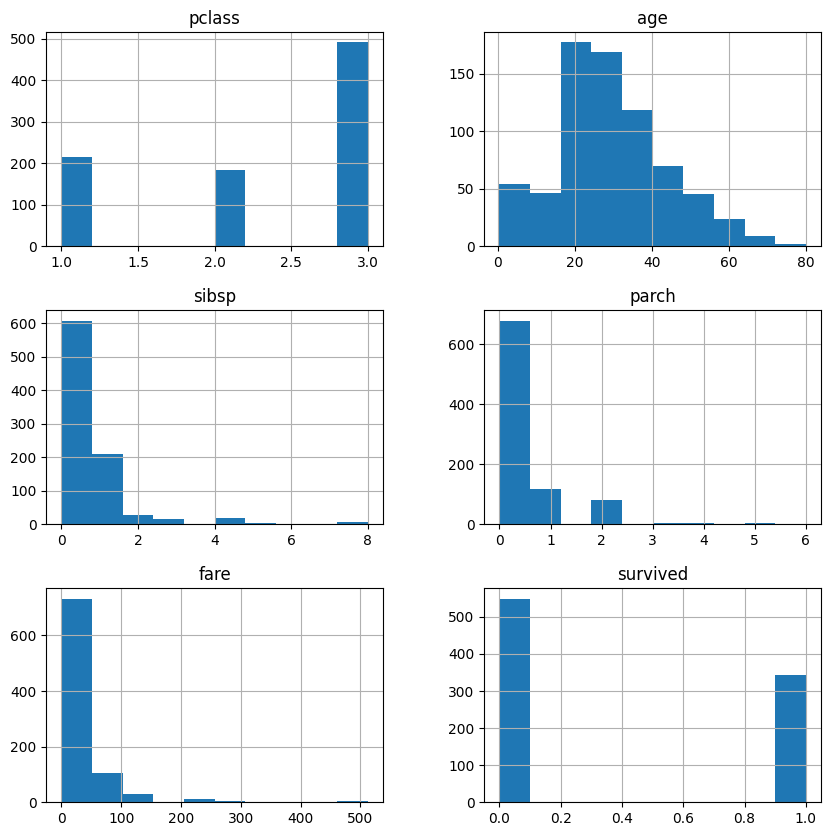

In [ ]:
# shows the distribution of the data
df.hist(figsize=(10, 10))
plt.show()

In [ ]:
# Check overall survival rates

survival_rate = df['survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

Overall survival rate: 38.38%


In [ ]:
# Check survival distribution and rate
survival_distribution = df['survived'].value_counts().tolist()
survival_distribution = {'Deceased':survival_distribution[0], 'Survived':survival_distribution[1]}

survival_rate = df['survived'].value_counts(normalize=True) * 100
survival_rate = survival_rate.rename({0: 'Deceased', 1: 'Survived'})
print(survival_distribution)
print(survival_rate)


{'Deceased': 549, 'Survived': 342}
survived
Deceased    61.616162
Survived    38.383838
Name: proportion, dtype: float64


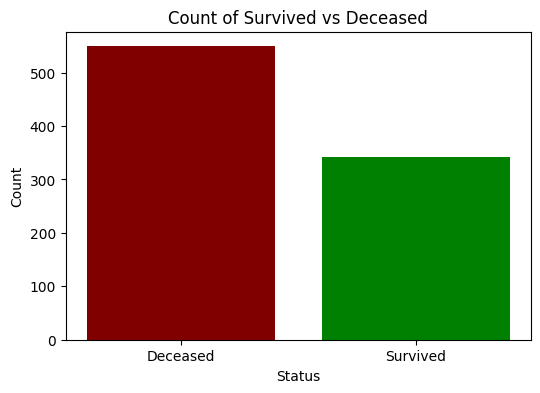

In [ ]:
# Plot overall count of survived and deceased

# Assuming 'df' is the DataFrame and 'survived' is the column
# representing survival status (0 for deceased, 1 for survived).

# Calculate survival rate
survived = df['survived'].count()

# Create a bar plot
plt.figure(figsize=(6, 4))
colors=["maroon","green"]
plt.bar(survival_distribution.keys(), survival_distribution.values(),color=colors)
plt.title('Count of Survived vs Deceased')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

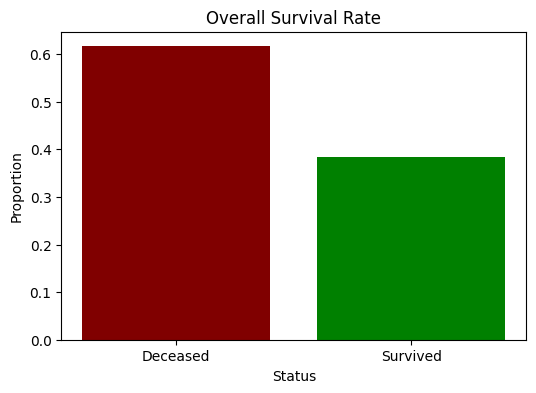

In [ ]:
# Plot overall survival rate

# Assuming 'df' is the DataFrame and 'survived' is the column
# representing survival status (0 for deceased, 1 for survived).

# Calculate survival rate
survival_rate = df['survived'].mean()

# Create a bar plot
colors=["maroon","green"]
plt.figure(figsize=(6, 4))
plt.bar(['Deceased','Survived'], [1 - survival_rate,survival_rate],color=colors)
plt.title('Overall Survival Rate')
plt.xlabel('Status')
plt.ylabel('Proportion')
plt.show()

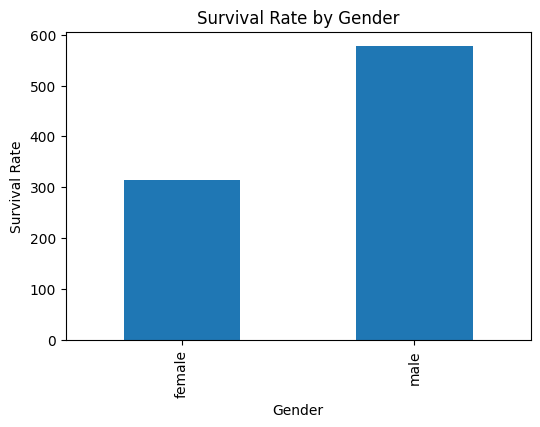

In [ ]:
# Visualize the survival rate by gender

# Group data by gender and calculate survival rate
survival_rate_by_gender = df.groupby('sex')['survived'].count()

# Create a bar plot
plt.figure(figsize=(6, 4))
survival_rate_by_gender.plot(kind='bar')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-14-3bc8f68243e8>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_class = df.groupby('class')['survived'].mean()


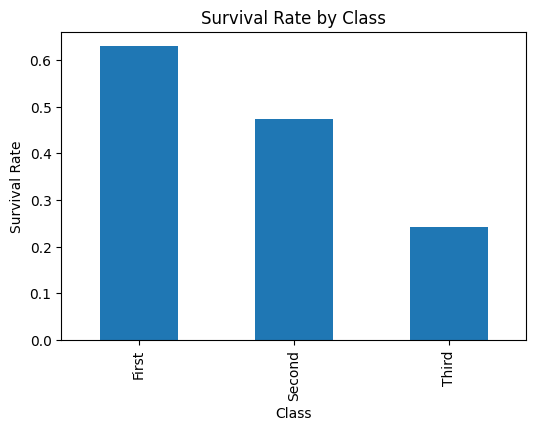

In [ ]:
# Visualize survival rate by class

survival_rate_by_class = df.groupby('class')['survived'].mean()
plt.figure(figsize=(6, 4))
survival_rate_by_class.plot(kind='bar')
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

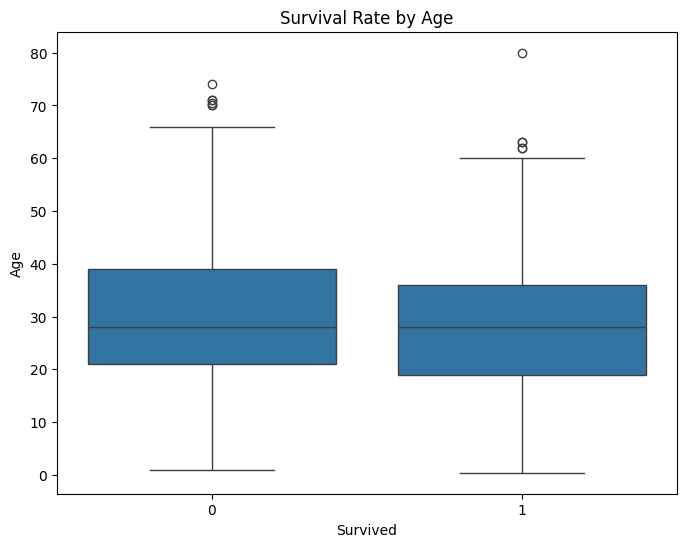

In [ ]:
# Visualize survival rate by age

plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Survival Rate by Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

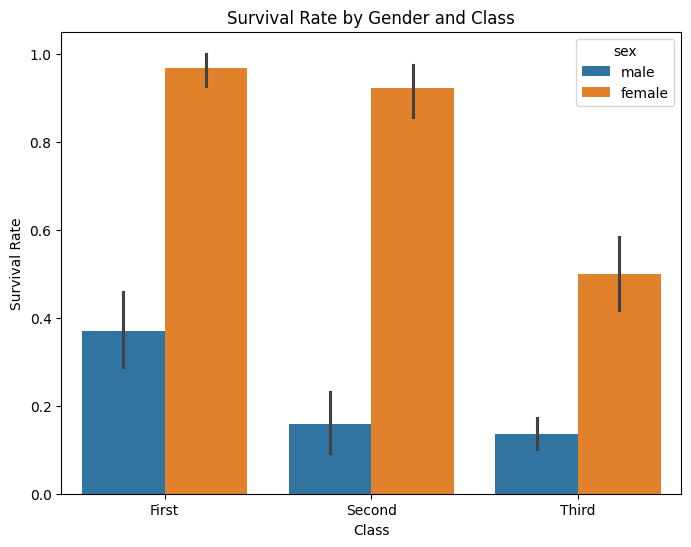

In [ ]:
# Visualize survival rate by gender and class using a grouped bar chart

plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='survived', hue='sex', data=df)
plt.title('Survival Rate by Gender and Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

2. **Data Cleaning**

In [ ]:
#Checking for missing values
missing_values= df.isnull().sum()

print("missing_values in each column:")
print(missing_values)

missing_values in each column:
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
survived         0
dtype: int64


In [ ]:
# Imputation: replace missing values in age with median
#why

df['age'] = df['age'].fillna(df['age'].median())

# Print some info to check the changes
print("Missing values in 'age' column after imputation:", df['age'].isnull().sum())
print("A few sample values from the 'age' column:\n", df['age'].head())

Missing values in 'age' column after imputation: 0
A few sample values from the 'age' column:
 0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64


In [ ]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [ ]:
# Check for missing values in 'deck' column before imputation
print("Missing values in 'deck' column before imputation:", df['deck'].isnull().sum())

# Imputation: replace missing values in deck with mode
df['deck'] = df['deck'].fillna(df['deck'].mode()[0])

# Check for missing values in 'deck' column after imputation
print("Missing values in 'deck' column after imputation:", df['deck'].isnull().sum())

# Display some of the imputed values
print("A few sample values from the 'deck' column:\n", df['deck'].head())



Missing values in 'deck' column before imputation: 688
Missing values in 'deck' column after imputation: 0
A few sample values from the 'deck' column:
 0    C
1    C
2    C
3    C
4    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [ ]:
# Check for missing values in 'embarked' column before imputation
print("Missing values in 'embarked' column before imputation:", df['embarked'].isnull().sum())

# Imputation: replace missing values in embarked with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Check for missing values in 'embarked' column after imputation
print("Missing values in 'embarked' column after imputation:", df['embarked'].isnull().sum())

# Display some of the imputed values
print("A few sample values from the 'embarked' column:\n", df['embarked'].head())



Missing values in 'embarked' column before imputation: 2
Missing values in 'embarked' column after imputation: 0
A few sample values from the 'embarked' column:
 0    S
1    C
2    S
3    S
4    S
Name: embarked, dtype: object


In [ ]:
# Check for missing values in 'embark_town' column before imputation
print("Missing values in 'embark_town' column before imputation:", df['embark_town'].isnull().sum())

# Imputation: replace missing values in embark_town with mode
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Check for missing values in 'embark_town' column after imputation
print("Missing values in 'embark_town' column after imputation:", df['embark_town'].isnull().sum())

# Display some of the imputed values
print("A few sample values from the 'embark_town' column:\n", df['embark_town'].head())

Missing values in 'embark_town' column before imputation: 2
Missing values in 'embark_town' column after imputation: 0
A few sample values from the 'embark_town' column:
 0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: embark_town, dtype: object


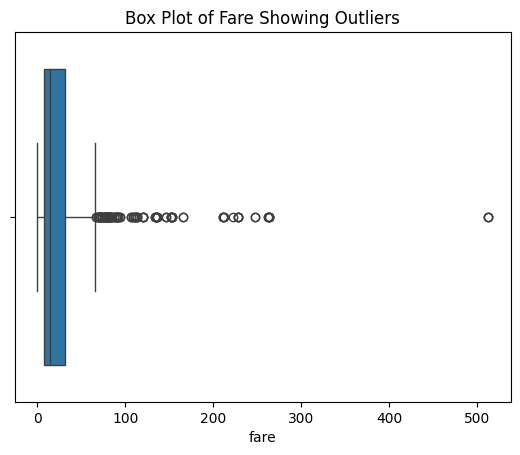

In [ ]:
#Use boxplot to detect outlier in fare
# Calculate quantiles and IQR
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Create a box plot to visualize outliers
sns.boxplot(x=df['fare'])
plt.title('Box Plot of Fare Showing Outliers')
plt.show()

# Filter the DataFrame to get outlier data points
outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]



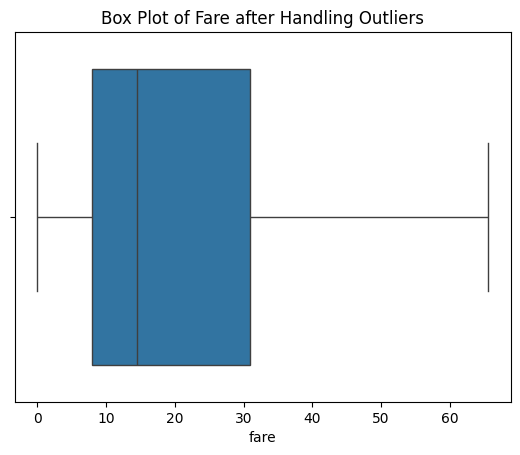

In [ ]:
#Handling outlier in fare
# Calculate quantiles and IQR
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Cap outliers to the upper and lower bounds
df['fare'] = np.clip(df['fare'], lower_bound, upper_bound)

# Create a box plot to visualize the data after handling outliers
sns.boxplot(x=df['fare'])
plt.title('Box Plot of Fare after Handling Outliers')
plt.show()





**3. Feature Engineering**

Create new features called :


*   family size based on Sibsp and Parch
*   Age Binning by grouping the Age into categories (children, teenagers, adults)
*   Fare Binning by gropuing the Fare feature into groups (high, normal, low)



In [ ]:
#create feature called family size by adding the Sibsp and Parch
size = df['sibsp'] + df['parch']
df['family_size'] = size
df['family_size'].head(20)

,family_size
0,1
1,1
2,0
3,1
4,0
5,0
6,0
7,4
8,2
9,1


In [ ]:
df['family_size'].value_counts()

,count
family_size,
0,537
1,161
2,102
3,29
5,22
4,15
6,12
10,7
7,6


In [ ]:
#Bucket the Age feature into categories (e.g., children, teenagers, adults, seniors)
age_bins = [0, 12, 19, 60, float('inf')]
age_labels = ['children', 'teenagers', 'adults', 'seniors']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
df['age_group'].head(20)

,age_group
0,adults
1,adults
2,adults
3,adults
4,adults
5,adults
6,adults
7,children
8,adults
9,teenagers


In [ ]:
df['age_group'].value_counts()

,count
age_group,
adults,726
teenagers,71
children,68
seniors,26


In [ ]:
df['fare'].describe()

,fare
count,891.000000
mean,24.046813
std,20.481625
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,65.634400


In [ ]:
#Categorize the Fare feature into groups based on ticket price ranges
fare_bins = [0, 7.91, 14.45, 31.0, float('inf')]
fare_labels = ['low', 'mid', 'high','premium']
df['fare_group'] = pd.cut(df['fare'], bins=fare_bins, labels=fare_labels, right=False)
df['fare_group'].head(20)

,fare_group
0,low
1,premium
2,mid
3,premium
4,mid
5,mid
6,premium
7,high
8,mid
9,high


In [ ]:
df['fare_group'].value_counts()

,count
fare_group,
high,226
premium,225
low,223
mid,217


**4. Data Transformation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          891 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  deck         891 non-null    category
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
 14  survived     891 non-null    int64   
 15  family_size  891 non-null    int64   
 16  age_group    891 non-null    category
 17  fare_group   891 non-null    category
dtypes: bool(2), category(4), float

In [ ]:
#Encode categorical variables like Sex, Embarked, and newly created features (AgeGroup, FareGroup)

In [ ]:
df_backup = df

In [ ]:
df_backup['sex'].value_counts()

,count
sex,
male,577
female,314


In [ ]:
df_backup['embarked'].value_counts()

,count
embarked,
S,646
C,168
Q,77


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical variables
for column in ['sex', 'embarked', 'age_group', 'fare_group', 'deck', 'who', 'embark_town', 'alive', 'class']:
    df[column] = label_encoder.fit_transform(df[column])

# Print the encoded DataFrame
print(df.head())

   pclass  sex   age  sibsp  parch     fare  embarked  class  who  adult_male  \
0       3    1  22.0      1      0   7.2500         2      2    1        True   
1       1    0  38.0      1      0  65.6344         0      0    2       False   
2       3    0  26.0      0      0   7.9250         2      2    2       False   
3       1    0  35.0      1      0  53.1000         2      0    2       False   
4       3    1  35.0      0      0   8.0500         2      2    1        True   

   deck  embark_town  alive  alone  survived  family_size  age_group  \
0     2            2      0  False         0            1          0   
1     2            0      1  False         1            1          0   
2     2            2      1   True         1            0          0   
3     2            2      1  False         1            1          0   
4     2            2      0   True         0            0          0   

   fare_group  
0           1  
1           3  
2           2  
3           3  


In [ ]:
df.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,family_size,age_group,fare_group
0,3,1,22.0,1,0,7.2500,2,2,1,True,2,2,0,False,0,1,0,1
1,1,0,38.0,1,0,65.6344,0,0,2,False,2,0,1,False,1,1,0,3
2,3,0,26.0,0,0,7.9250,2,2,2,False,2,2,1,True,1,0,0,2
3,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False,1,1,0,3
4,3,1,35.0,0,0,8.0500,2,2,1,True,2,2,0,True,0,0,0,2
5,3,1,28.0,0,0,8.4583,1,2,1,True,2,1,0,True,0,0,0,2
6,1,1,54.0,0,0,51.8625,2,0,1,True,4,2,0,True,0,0,0,3
7,3,1,2.0,3,1,21.0750,2,2,0,False,2,2,0,False,0,4,1,0
8,3,0,27.0,0,2,11.1333,2,2,2,False,2,2,1,False,1,2,0,2
9,2,0,14.0,1,0,30.0708,0,1,0,False,2,0,1,False,1,1,3,0


In [ ]:
df.corrwith(df['survived'])

,0
pclass,-0.338481
sex,-0.543351
age,-0.064910
sibsp,-0.035322
parch,0.081629
fare,0.317430
embarked,-0.167675
class,-0.338481
who,0.325753
adult_male,-0.557080


In [ ]:
#Scale numerical features (Fare, Age, FamilySize) using a standard scaler or min-max scaler.
#MinMax Scaler is often used as an alternative to Standard Scaler if zero mean and unit variance want to be avoided

list_num = ['fare', 'age', 'family_size']
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
df[list_num] = scaler.fit_transform(df[list_num])
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived,family_size,age_group,fare_group
0,3,1,0.271174,1,0,0.110460,2,2,1,True,2,2,0,False,0,0.1,0,1
1,1,0,0.472229,1,0,1.000000,0,0,2,False,2,0,1,False,1,0.1,0,3
2,3,0,0.321438,0,0,0.120745,2,2,2,False,2,2,1,True,1,0.0,0,2
3,1,0,0.434531,1,0,0.809027,2,0,2,False,2,2,1,False,1,0.1,0,3
4,3,1,0.434531,0,0,0.122649,2,2,1,True,2,2,0,True,0,0.0,0,2


In [ ]:
df.corrwith(df['survived'])

,0
pclass,-0.338481
sex,-0.543351
age,-0.064910
sibsp,-0.035322
parch,0.081629
fare,0.317430
embarked,-0.167675
class,-0.338481
who,0.325753
adult_male,-0.557080


In [ ]:
#re-arrange the features with survive at the right-most
cols = list(df.columns)
cols.remove('survived')
df = df[cols + ['survived']]

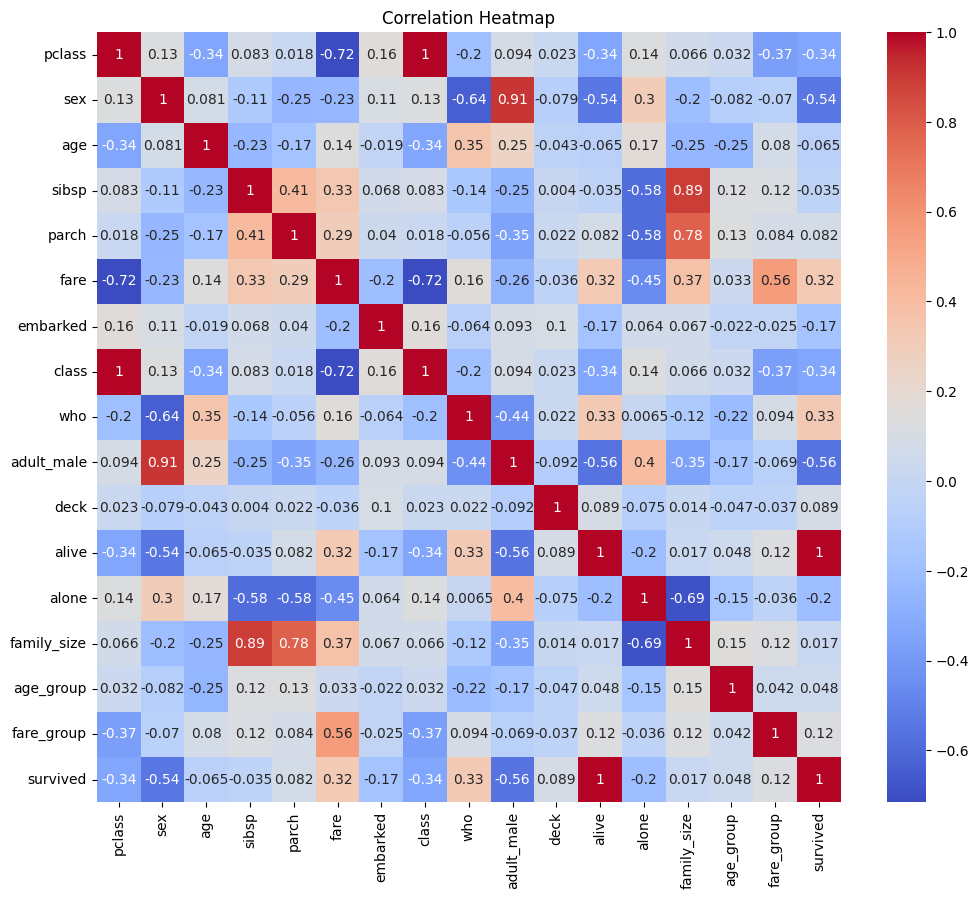

In [ ]:
#plot a seaborn heatmap showing correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**5. Model Preparation**

In [ ]:
#drop the embarked town features
df.drop(['embark_town'], axis=1, inplace=True)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(df.drop(['survived'], axis=1), df['survived'])
selected_features = df.drop(['survived'], axis=1).columns[selector.get_support()]

#Print the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['pclass', 'sex', 'fare', 'embarked', 'class', 'who', 'adult_male',
       'alive', 'alone', 'fare_group'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
#split the data into training and test sets in ratio of 70 and 30.
X = df.drop(['survived'], axis=1)
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Train a simple classification model (Logistic Regression) to predict survival
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Evaluate the model using accuracy, confusion matrix, and classification report.
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Accuracy: 1.0


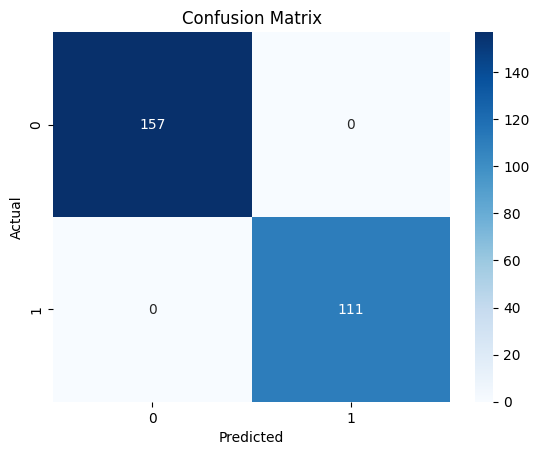

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       111

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [ ]:
#print the results
print("Accuracy:", accuracy)
#plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report:\n", class_report)